In [37]:
class Particle:
    def __init__(self, x, y, ang_vel):
        self.x = x
        self.y = y
        self.ang_vel = ang_vel
class ParticleSimulator:
    def __init__(self, particles):
        self.particles = particles
    def evolve(self, dt):
        timestep = 0.00001
        nsteps = int(dt/timestep)
        
        for i in range(nsteps):
            for p in self.particles:
                #計算方向
                norm = (p.x**2+p.y**2)**0.5
                v_x = -p.y/norm
                v_y = p.x/norm
                
                #計算位移
                d_x = timestep * p.ang_vel * v_x
                d_y = timestep * p.ang_vel * v_y
                
                p.x += d_x
                p.y += d_y                
                #重複

In [38]:
import matplotlib.pyplot as plt
from matplotlib import animation
def visualize(simulator):
    X = [p.x for p in simulator.particles]
    Y = [p.y for p in simulator.particles]
    fig = plt.figure()
    ax = plt.subplot(111, aspect = "equal")
    line, = ax.plot(X ,Y ,"ro") #此逗號不可少
    
    #指定坐標軸範圍
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    
    def init():
        line.set_data([], [])
        return line,
    def animate(i):
        #粒子移動0.01個時間單位
        simulator.evolve(0.01)
        X = [p.x for p in simulator.particles]
        Y = [p.y for p in simulator.particles]
      
        line.set_data(X, Y)
        return line,
    anim = animation.FuncAnimation(fig = fig,
                               func = animate,
                              init_func= init,
                              blit = True,
                              interval = 10)
    return anim

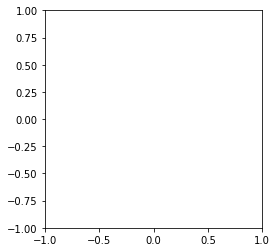

In [39]:
def test_visualize():
    particles = [Particle(0.3, 0.5, 1),
                Particle(0.0, -0.5, -1),
                Particle(-0.1, -0.4, 3)]
    simulator = ParticleSimulator(particles)
    visualize(simulator)
if __name__ == "__main__":
    test_visualize()

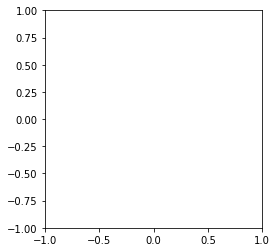

In [40]:
def test_evolve():
    particles = [Particle(0.3, 0.5, +1),
                Particle(0.0, -0.5, -1),
                Particle(-0.1, -0.4, +3)]
    simulator = ParticleSimulator(particles)
    
    simulator.evolve(0.1)
    
    p0, p1, p2 = particles
    def fequal(a, b, eps = 1e-5):
        return abs(a - b) < eps
    assert fequal(p0.x, 0.210269)
    assert fequal(p0.y, 0.543863)
    
    assert fequal(p1.x, -0.099334)
    assert fequal(p1.y, -0.490034)
    
    assert fequal(p2.x, 0.191358)
    assert fequal(p2.y, -0.365227)
if __name__ == "__main__":
    test_visualize()    
    

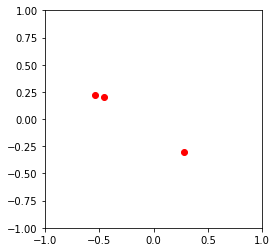

In [42]:
particles = [Particle(0.3, 0.5, +1),
            Particle(0.0, -0.5, -1),
            Particle(-0.1, -0.4, +3)]
simulator = ParticleSimulator(particles)

HTML(visualize(simulator).to_jshtml())

In [6]:
from random import uniform
def benchmark():
    particles = [Particle(uniform(-1.0, 1.0),
                         uniform(-1.0, 1.0),
                         uniform(-1.0, 1.0))
                for i in range(1000)]
    simulator = ParticleSimulator(particles)
    simulator.evolve(0.1)
if __name__ == "__main__":
    benchmark() 

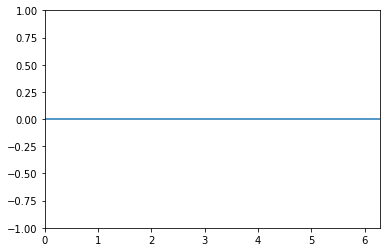

In [12]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np


def init_animation():
    global line
    line, = ax.plot(x, np.zeros_like(x))
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1,1)

def animate(i):
    line.set_ydata(np.sin(2*np.pi*i / 50)*np.sin(x))
    return line,

fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(0, 2*np.pi, 200)

ani = matplotlib.animation.FuncAnimation(fig, animate, init_func=init_animation, frames=50)
plt.show()

In [20]:
from matplotlib import animation, rc
from IPython.display import HTML

In [21]:
rc('animation', html='html5')

In [34]:
HTML(anim.to_jshtml())

NameError: name 'anim' is not defined